In [1]:
# To support both python 2 and python 3
# 让这份笔记同步支持 python 2 和 python 3
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

 **This exercise involves the Auto data set studied in the lab. Make sure
that the missing values have been removed from the data.**

**(a) Which of the predictors are quantitative, and which are quali-
tative?**

In [2]:
Auto = pd.read_csv('Data/Auto.csv', na_values='?').dropna()
Auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [3]:
Auto['cylinders'].value_counts()

4    199
8    103
6     83
3      4
5      3
Name: cylinders, dtype: int64

In [4]:
Auto['origin'].value_counts()

1    245
3     79
2     68
Name: origin, dtype: int64

quantitative: mpg, cylinders, displacement, horsepower, weight,acceleration, year

qualitative: name, origin

**(b) What is the range of each quantitative predictor? You can answer this using the range() function.**

**(c) What is the mean and standard deviation of each quantitative predictor?**

In [5]:
Auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


**(d) Now remove the 10th through 85th observations. What is the
range, mean, and standard deviation of each predictor in the
subset of the data that remains?**

In [6]:
Auto.drop([9,84]).describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000
mean,23.458462,5.469231,194.160256,104.292308,2977.597436,15.556923,76.005128,1.574359
std,7.811232,1.703716,104.325785,38.336042,849.268940,2.742335,3.675105,0.803821
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.125000,4.000000,105.000000,75.000000,2226.500000,13.800000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,265.750000,125.000000,3612.000000,17.075000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


**(e) Using the full data set, investigate the predictors graphically,
using scatterplots or other tools of your choice. Create some plots
highlighting the relationships among the predictors. Comment
on your findings.**

In [7]:
from pandas.plotting import scatter_matrix

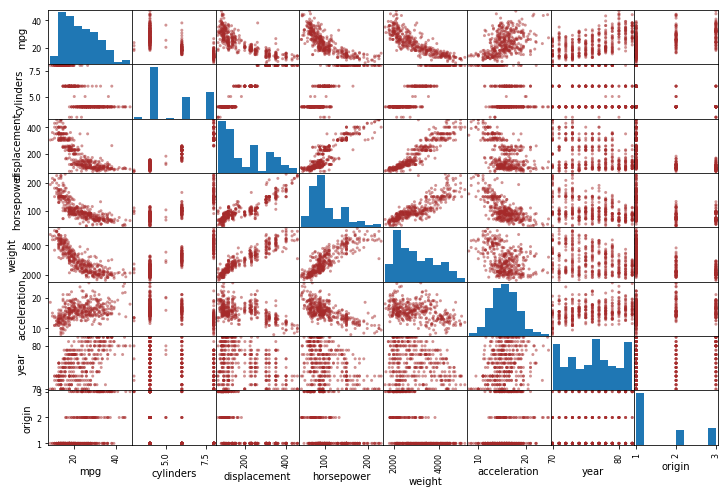

In [8]:
scatter_matrix(Auto, color="brown",figsize=(12, 8))
plt.grid(linestyle='')

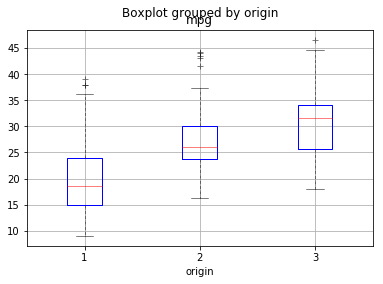

In [9]:
f = Auto.boxplot(column="mpg", by="origin",sym = '+',return_type = 'dict') 
for box in f['mpg']['boxes']:
    box.set( color='b', linewidth=1)        # 箱体边框颜色
for whisker in f['mpg']['whiskers']:
    whisker.set(color='k', linewidth=0.5,linestyle='-.')
for cap in f['mpg']['caps']:
    cap.set(color='Black', linewidth=0.5)
for median in f['mpg']['medians']:
    median.set(color='Red', linewidth=0.5)
for flier in f['mpg']['fliers']:
    flier.set(marker='+',color='Blue',linewidth=0.5,alpha=0.5)

**(f) Suppose that we wish to predict gas mileage ( mpg ) on the basis
of the other variables. Do your plots suggest that any of the
other variables might be useful in predicting mpg ? Justify your
answer.**

cylinders, displacement, horsepower, weight,acceleration, year,origin

In [10]:
Auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [11]:
Auto.corr()['mpg'].sort_values(ascending=False)

mpg             1.000000
year            0.580541
origin          0.565209
acceleration    0.423329
cylinders      -0.777618
horsepower     -0.778427
displacement   -0.805127
weight         -0.832244
Name: mpg, dtype: float64

 All of the predictors show some correlation with mpg. The name predictor has  too little observations per name though, so using this as a predictor is  likely to result in overfitting the data and will not generalize well.